In [42]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [43]:
# Import the data set
titanic_df = pd.read_csv("titanic.csv")

# Explore the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# Explore the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [46]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [47]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [48]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


- Select relevant variables from the data and split the data into a training, development, and test set. 

In [49]:
features = [
    'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
    'Sex_female', 'Sex_male', 
    'Embarked_C', 'Embarked_Q', 'Embarked_S'
]
X = titanic_df[features]
y = titanic_df['Survived']

In [50]:
# First split off 20% for test
rseed = 42
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rseed
)

# Of the remaining 80%, split 25% as dev => 80% * 25% = 20% total
X_train, X_dev, y_train, y_dev = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=rseed
)

print("Training set size:", X_train.shape[0])
print("Development set size:", X_dev.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 534
Development set size: 178
Test set size: 179


- Train a decision tree and make a plot of it. 

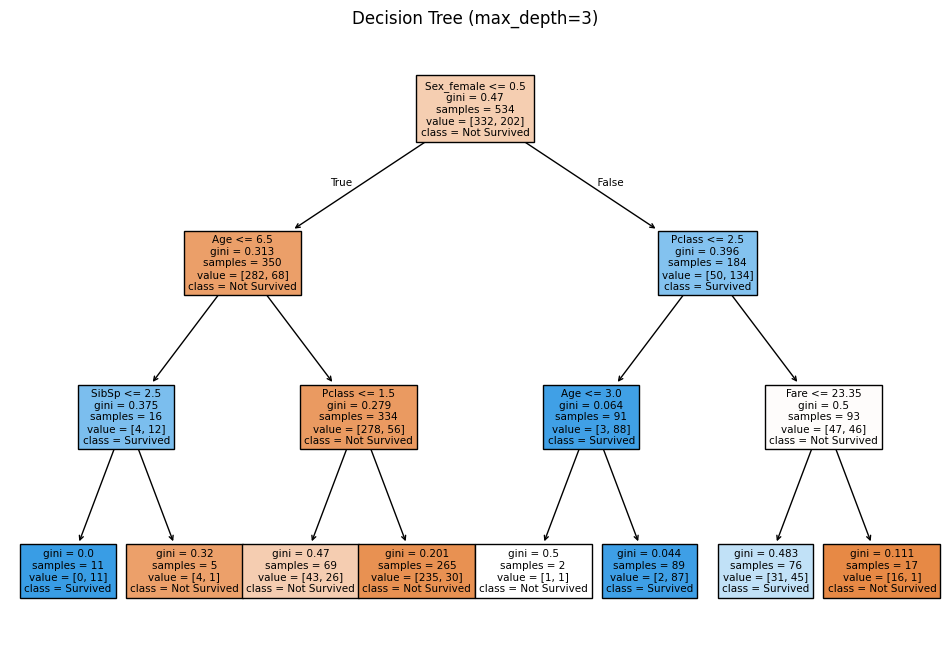

In [51]:
clf = DecisionTreeClassifier(max_depth=3, random_state=rseed)
clf.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(
    clf, 
    feature_names=features, 
    class_names=['Not Survived', 'Survived'],
    filled=True
)
plt.title("Decision Tree (max_depth=3)")
plt.show()


- Compute your model's accuracy on the development set. 

In [52]:
train_predictions = clf.predict(X_train)
dev_predictions = clf.predict(X_dev)

train_accuracy = accuracy_score(y_train, train_predictions)
dev_accuracy = accuracy_score(y_dev, dev_predictions)

print(f"Training Accuracy (max_depth=3): {train_accuracy:.3f}")
print(f"Development Accuracy (max_depth=3): {dev_accuracy:.3f}")

Training Accuracy (max_depth=3): 0.828
Development Accuracy (max_depth=3): 0.848


- Try building your model with different values of the max_depht [2-10]. At each step, create a plot of your tree and store the accuracies on both the training and development data. 

In [53]:
depths = range(2, 11)  # 2 through 10
train_accuracies = []
dev_accuracies = []

for d in depths:
    clf_d = DecisionTreeClassifier(max_depth=d, random_state=rseed)
    clf_d.fit(X_train, y_train)
    
    # Predictions
    train_pred = clf_d.predict(X_train)
    dev_pred = clf_d.predict(X_dev)
    
    # Accuracy
    train_acc = accuracy_score(y_train, train_pred)
    dev_acc = accuracy_score(y_dev, dev_pred)
    
    train_accuracies.append(train_acc)
    dev_accuracies.append(dev_acc)


- Plot a line of your training accuracies and another of your development accuracies in the same graph. Write down what shape the lines have and what this shape means. 

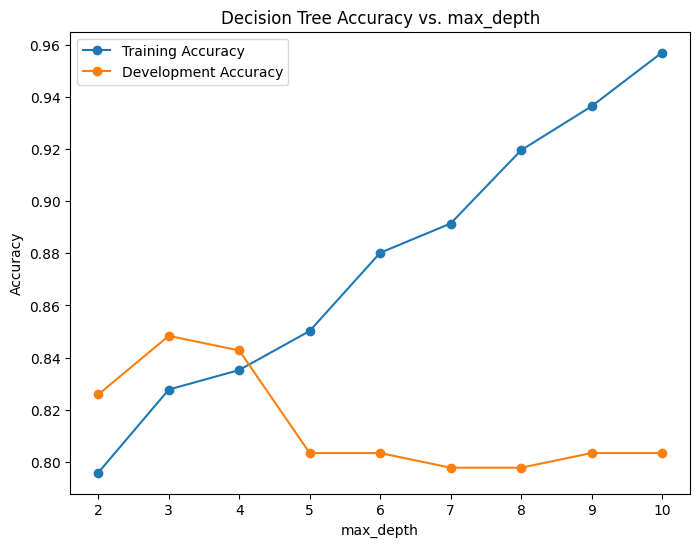

In [54]:
# Plotting
plt.figure(figsize=(8,6))
plt.plot(depths, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(depths, dev_accuracies, marker='o', label='Development Accuracy')
plt.title('Decision Tree Accuracy vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Decision Tree Accuracy vs. max_depth plot analysis**

Training Accuracy (blue line) steadily increases as max_depth grows. This is expected, because deeper trees can memorize the training data more effectively.

Development Accuracy (orange line) peaks around depths 3 or 4, then starts to decline as the tree grows deeper. At those depths, the model strikes a good balance between capturing the underlying patterns and not overfitting.

- At lower depths, the model is too simple (underfitting), so both training and development accuracies are lower.

- At medium depths (around 3 or 4), the development accuracy reaches its highest point—this is the 'sweet spot' where the model generalises well.

- At higher depths (beyond 4), the training accuracy keeps going up, but the development accuracy drops, indicating overfitting. The model is fitting noise in the training set rather than learning generalizable patterns.

Conclusion: 

Based on the chart, max_depth = 3 or 4 appears to be the optimal choice for balancing bias and variance in this particular dataset.

- Report the accuracy of your final model on the test data. 

In [55]:

best_depth = depths[np.argmax(dev_accuracies)]
final_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_clf.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, final_clf.predict(X_test))
print("Best Depth:", best_depth)
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Depth: 3
Test Accuracy: 0.7989
